In [1]:
from backend import *

In [6]:

subst_a = Substancia("A", "A")
subst_b = Substancia("B", "B")
subst_c = Substancia("C", "C")
subst_d = Substancia("D", "D")
subst_e = Substancia("E", "E")

r1 = Reacao("R1", 
            "Reação fotólise", 
            {subst_a: 1}, 
            {subst_b: 1, subst_c: 1},
            TaxaReacaoFotolise(subst_a, {"phi": 0.09, "Ep0": 1, "epsilon": 1, 
                                            "Abs": 1, "l": None, "l_reator": 1}),
            True
)

r2 = Reacao(
    "R2",
    "Reação 2",
    {subst_a: 1, subst_b: 1},
    {subst_d: 1},
    TaxaReacaoPowerlaw({subst_a: 1, subst_b: 1}, None),
    False
)

r3 = Reacao(
    "R3",
    "Reação 3",
    {subst_a: 1, subst_d: 1},
    {subst_e: 1},
    TaxaReacaoPowerlaw({subst_a: 1, subst_d: 1}, None),
    False
)

reator = ReatorBatelada(
    {subst_a: 1},
    [r1, r2, r3],
    OpcoesDeSimulacao((0,20), max_step=0.05)
)

pts_exp = {subst_e: {0.0: 0.0, 1.981981981981982: 0.01202595984628, 3.983983983983984: 0.04944958425057544, 5.985985985985986: 0.09104332089427424, 7.987987987987988: 0.12542680111801383, 9.98998998998999: 0.15085852570404154, 11.991991991991991: 0.16854592850623157, 13.993993993993994: 0.1805207385991573, 15.995995995995996: 0.1884811323167884, 17.997997997998: 0.1937587478081469, 20.0: 0.1972047565025434}}
lst_metodos = [None, 'Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B', 'TNC', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov']
resultados = {}
for opt in lst_metodos:
    try:
        print(f"Tentando {opt}")
        otimizador = Otimizador(
            reator,
            pts_exp,
            OpcoesDeOtimizacao(None, [r1, r2, r3], None, [0.4, 0.4, 0.4], 0.0000001)
        )

        result = otimizador.otimizar()

        resultados[opt] = otimizador.get_dados_para_grafico()

        print(f"Método: {opt}")
        print(result)
        print()
    except Exception as e:
        print(e)



Tentando None
[0.4 0.4 0.4]
[0.40000001 0.4        0.4       ]
[0.4        0.40000001 0.4       ]
[0.4        0.4        0.40000001]
[0.45045905 0.44229733 0.45362578]
[0.45045907 0.44229733 0.45362578]
[0.45045905 0.44229735 0.45362578]
[0.45045905 0.44229733 0.45362579]
[0.50598064 0.48767623 0.5073783 ]
[0.50598066 0.48767623 0.5073783 ]
[0.50598064 0.48767624 0.5073783 ]
[0.50598064 0.48767623 0.50737832]
[0.53596932 0.50686911 0.52719982]
[0.53596934 0.50686911 0.52719982]
[0.53596932 0.50686912 0.52719982]
[0.53596932 0.50686911 0.52719983]
[0.55875384 0.51558814 0.53275733]
[0.55875385 0.51558814 0.53275733]
[0.55875384 0.51558816 0.53275733]
[0.55875384 0.51558814 0.53275735]
[0.60303452 0.52546752 0.53213182]
[0.60303453 0.52546752 0.53213182]
[0.60303452 0.52546753 0.53213182]
[0.60303452 0.52546752 0.53213183]
[0.68304066 0.53796619 0.5221055 ]
[0.68304067 0.53796619 0.5221055 ]
[0.68304066 0.53796621 0.5221055 ]
[0.68304066 0.53796619 0.52210551]
[0.838854   0.5592096  0.49

In [7]:
print(resultados)

{None: {Substancia(name='E', id='E', molar_mass=None): {np.float64(0.0): np.float64(0.0), np.float64(0.008723667120363711): np.float64(2.127516047506812e-09), np.float64(0.05872366712036371): np.float64(6.366923185138915e-07), np.float64(0.10872366712036372): np.float64(3.96451430101825e-06), np.float64(0.15872366712036373): np.float64(1.2102727356152891e-05), np.float64(0.20872366712036372): np.float64(2.7003901018521243e-05), np.float64(0.2587236671203637): np.float64(5.0464480220588186e-05), np.float64(0.3087236671203637): np.float64(8.413285515441074e-05), np.float64(0.3587236671203637): np.float64(0.00012951708009395865), np.float64(0.4087236671203637): np.float64(0.000187992258404299), np.float64(0.45872366712036367): np.float64(0.00026080760952682934), np.float64(0.5087236671203637): np.float64(0.00034909323246191005), np.float64(0.5587236671203637): np.float64(0.00045386657915194145), np.float64(0.6087236671203637): np.float64(0.0005760386501815434), np.float64(0.65872366712036

{None: {np.float64(0.0): np.float64(0.0), np.float64(0.008723667120363711): np.float64(2.127516047506812e-09), np.float64(0.05872366712036371): np.float64(6.366923185138915e-07), np.float64(0.10872366712036372): np.float64(3.96451430101825e-06), np.float64(0.15872366712036373): np.float64(1.2102727356152891e-05), np.float64(0.20872366712036372): np.float64(2.7003901018521243e-05), np.float64(0.2587236671203637): np.float64(5.0464480220588186e-05), np.float64(0.3087236671203637): np.float64(8.413285515441074e-05), np.float64(0.3587236671203637): np.float64(0.00012951708009395865), np.float64(0.4087236671203637): np.float64(0.000187992258404299), np.float64(0.45872366712036367): np.float64(0.00026080760952682934), np.float64(0.5087236671203637): np.float64(0.00034909323246191005), np.float64(0.5587236671203637): np.float64(0.00045386657915194145), np.float64(0.6087236671203637): np.float64(0.0005760386501815434), np.float64(0.6587236671203638): np.float64(0.0007164199243412991), np.float

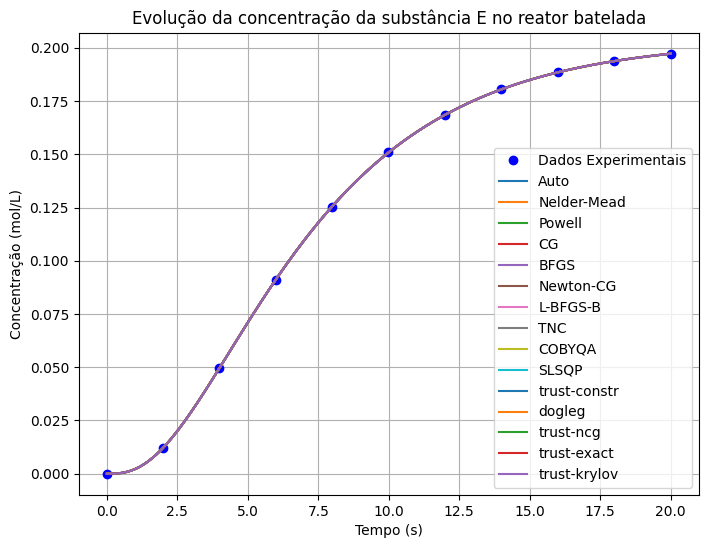

In [12]:
# Filtra o resultado para substancia
resultado_filtrado = {metodo: resultado[subst_e] for metodo, resultado in resultados.items()}
print(resultado_filtrado)

# Cria a figura e o eixo
fig, ax = plt.subplots(figsize=(8, 6))

# Plota dados exp
t_exp = list(pts_exp[subst_e].keys())
y_exp = [pts_exp[subst_e][t] for t in t_exp]
ax.plot(t_exp, y_exp, 'bo', label="Dados Experimentais")

# Plota evolução pra cada método
for metodo, result in resultado_filtrado.items():
    metodo = "Auto" if metodo is None else metodo
    #print(result)
    t = list(result.keys())
    y = [result[tempo] for tempo in t]
    ax.plot(t, y, label=metodo)

ax.set_xlabel("Tempo (s)")
ax.set_ylabel("Concentração (mol/L)")
ax.set_title("Evolução da concentração da substância E no reator batelada")
ax.legend()
ax.grid(True)

plt.show()